# **Intro**

In [ ]:
# Importing library

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from datetime import datetime, date

# **Functions**

In [ ]:
# Date-time Parsing

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

# **Load Dataset**

In [ ]:
# Load dataset

path = 'drive/My Drive/Final_project/Dataset/covid_19_clean_complete.csv'
dataset = pd.read_csv(path, date_parser=parser, parse_dates=[4])
dataset = dataset.rename(columns={"Country/Region": "Country_Reg", "Province/State":"Prov_State"})

In [ ]:
dataset.head()

,Prov_State,Country_Reg,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Prov_State   14664 non-null  object        
 1   Country_Reg  49068 non-null  object        
 2   Lat          49068 non-null  float64       
 3   Long         49068 non-null  float64       
 4   Date         49068 non-null  datetime64[ns]
 5   Confirmed    49068 non-null  int64         
 6   Deaths       49068 non-null  int64         
 7   Recovered    49068 non-null  int64         
 8   Active       49068 non-null  int64         
 9   WHO Region   49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
# Check all countries and regions

dataset['Country_Reg'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [ ]:
# Check all provinces and states

dataset['Prov_State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

# **Filter by country**

In [ ]:
# Select country

country = 'Thailand'
query = 'Country_Reg == "' + country + '"'
country_df = dataset.query(query)
country_df

,Prov_State,Country_Reg,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
207,NaN,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia
468,NaN,Thailand,15.870032,100.992541,2020-01-23,3,0,0,3,South-East Asia
729,NaN,Thailand,15.870032,100.992541,2020-01-24,5,0,0,5,South-East Asia
990,NaN,Thailand,15.870032,100.992541,2020-01-25,7,0,0,7,South-East Asia
1251,NaN,Thailand,15.870032,100.992541,2020-01-26,8,0,2,6,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47970,NaN,Thailand,15.870032,100.992541,2020-07-23,3279,58,3107,114,South-East Asia
48231,NaN,Thailand,15.870032,100.992541,2020-07-24,3279,58,3107,114,South-East Asia
48492,NaN,Thailand,15.870032,100.992541,2020-07-25,3282,58,3109,115,South-East Asia
48753,NaN,Thailand,15.870032,100.992541,2020-07-26,3291,58,3109,124,South-East Asia


In [ ]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 207 to 49014
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Prov_State   0 non-null      object        
 1   Country_Reg  188 non-null    object        
 2   Lat          188 non-null    float64       
 3   Long         188 non-null    float64       
 4   Date         188 non-null    datetime64[ns]
 5   Confirmed    188 non-null    int64         
 6   Deaths       188 non-null    int64         
 7   Recovered    188 non-null    int64         
 8   Active       188 non-null    int64         
 9   WHO Region   188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 16.2+ KB


In [ ]:
# Replace index with datetime
country_df = country_df.set_index('Date')

# Filter important columns
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
country_df = country_df.filter(items=cols, axis=1)

In [ ]:
country_df

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,2,0,0,2
2020-01-23,3,0,0,3
2020-01-24,5,0,0,5
2020-01-25,7,0,0,7
2020-01-26,8,0,2,6
...,...,...,...,...
2020-07-23,3279,58,3107,114
2020-07-24,3279,58,3107,114
2020-07-25,3282,58,3109,115


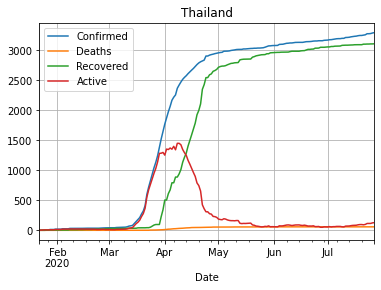

In [ ]:
# Plot country dataset

country_df.plot(grid=True)
plt.title(country)
plt.show()

In [ ]:
# Save to csv file

save_path = country.lower()+"_covid_19_cases.csv"
country_df.to_csv(save_path)

# **Filter by case type**

In [ ]:
# Select case type

case_type = 'Confirmed'
case_type_df = country_df[case_type]

In [ ]:
case_type_df

Date
2020-01-22       2
2020-01-23       3
2020-01-24       5
2020-01-25       7
2020-01-26       8
              ... 
2020-07-23    3279
2020-07-24    3279
2020-07-25    3282
2020-07-26    3291
2020-07-27    3297
Name: Confirmed, Length: 188, dtype: int64

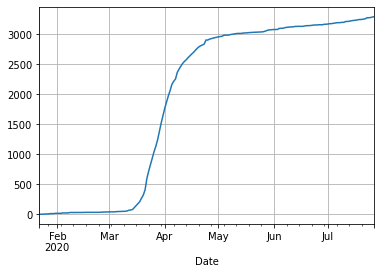

In [ ]:
# Plot case type dataset

case_type_df.plot(grid=True)
plt.show()

In [ ]:
# Save to csv file

save_path = country.lower()+"_covid_19_"+case_type.lower()+"_cases.csv"
case_type_df.to_csv(save_path)